<a href="https://colab.research.google.com/github/Folia412/Data_Analysis_2023/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras, nn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from tensorflow.python.keras.backend import expand_dims
import tensorflow_datasets as tfds
import tensorflow as tf
import re
import string

In [110]:
df = pd.read_csv("riceClassification.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [111]:
data = df[['Area','Eccentricity','Extent', 'Perimeter', 'Roundness', 'Class']]

In [112]:
y = df[['Class']]
y = np.array(y)
x = df[['Area','Eccentricity', 'Extent', 'Perimeter', 'Roundness']]

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=20)

In [114]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [115]:
model_1 = keras.Sequential(
    [
        keras.layers.Dense(256, activation="relu", input_shape=(x_train.shape[-1], )),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(128, activation="sigmoid"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               1536      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35585 (139.00 KB)
Trainable params: 35073 (137.00 KB)
Non-trainable params: 512 (2.00 KB)
________________

In [116]:
model_1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001), loss="binary_crossentropy", metrics=["accuracy"])

In [117]:
model_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=128)

Epoch 1/25
86/86 [==============================] - 6s 17ms/step - loss: 0.6775 - accuracy: 0.5809 - val_loss: 0.7080 - val_accuracy: 0.5553
Epoch 2/25
86/86 [==============================] - 1s 8ms/step - loss: 0.6097 - accuracy: 0.6336 - val_loss: 0.6902 - val_accuracy: 0.5553
Epoch 3/25
86/86 [==============================] - 1s 9ms/step - loss: 0.5492 - accuracy: 0.7052 - val_loss: 0.6644 - val_accuracy: 0.5553
Epoch 4/25
86/86 [==============================] - 1s 8ms/step - loss: 0.4982 - accuracy: 0.7691 - val_loss: 0.6245 - val_accuracy: 0.5553
Epoch 5/25
86/86 [==============================] - 1s 8ms/step - loss: 0.4472 - accuracy: 0.8294 - val_loss: 0.5657 - val_accuracy: 0.5722
Epoch 6/25
86/86 [==============================] - 1s 8ms/step - loss: 0.4045 - accuracy: 0.8745 - val_loss: 0.4881 - val_accuracy: 0.8584
Epoch 7/25
86/86 [==============================] - 1s 7ms/step - loss: 0.3646 - accuracy: 0.9087 - val_loss: 0.4039 - val_accuracy: 0.9391
Epoch 8/25
86/86 [=

In [118]:
predictions = model_1.predict(x_test)
print(accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)))

228/228 [==============================] - 1s 2ms/step
1.0


#2 завдання

[PosixPath('/content/drive/MyDrive/train/apples/img_p1_46.jpeg'), PosixPath('/content/drive/MyDrive/train/apples/img_p2_32.jpeg'), PosixPath('/content/drive/MyDrive/train/apples/img_p2_92.jpeg'), PosixPath('/content/drive/MyDrive/train/apples/img_p1_4.jpeg'), PosixPath('/content/drive/MyDrive/train/apples/img_p1_125.jpeg'), PosixPath('/content/drive/MyDrive/train/apples/img_p2_100.jpeg'), PosixPath('/content/drive/MyDrive/train/apples/img_p3_31.jpeg'), PosixPath('/content/drive/MyDrive/train/apples/img_p2_30.jpeg'), PosixPath('/content/drive/MyDrive/train/apples/img_p2_47.jpeg'), PosixPath('/content/drive/MyDrive/train/apples/img_p3_29.jpeg'), PosixPath('/content/drive/MyDrive/train/apples/img_p2_70.jpeg'), PosixPath('/content/drive/MyDrive/train/apples/img_p1_59.jpeg'), PosixPath('/content/drive/MyDrive/train/apples/img_p1_23.jpeg'), PosixPath('/content/drive/MyDrive/train/apples/img_p3_76.jpeg'), PosixPath('/content/drive/MyDrive/train/apples/img_p3_20.jpeg'), PosixPath('/content/dri

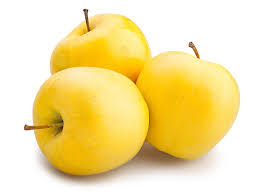

In [119]:
import pathlib
import PIL
data = "/content/drive/MyDrive/train"
data = pathlib.Path(data).with_suffix('')
image_apples = list(data.glob('apples/*.jpeg'))
image_tomatoes = list(data.glob('tomatoes/*.jpeg'))
print(image_apples, image_tomatoes)
PIL.Image.open(str(image_apples[-16]))

In [120]:
img_height = 180
img_width = 180

In [121]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ])

In [122]:
train = keras.utils.image_dataset_from_directory(data, validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size=32)

Found 294 files belonging to 2 classes.
Using 236 files for training.


In [123]:
class_names = train.class_names
print(class_names)

['apples', 'tomatoes']


In [124]:
val = keras.utils.image_dataset_from_directory(data, validation_split=0.2, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=32)

Found 294 files belonging to 2 classes.
Using 58 files for validation.


In [125]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

In [126]:
model_2 = keras.Sequential([
  data_augmentation,
  keras.layers.Rescaling(1./255),
  keras.layers.Conv2D(64, 3, strides=2, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Conv2D(128, 3, strides=2, padding='same', activation='tanh'),
  keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.3),
  keras.layers.Conv2D(256, 3, strides=2, padding='same', activation='tanh'),
  keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Flatten(),
  keras.layers.Dense(256, activation='sigmoid'),
  keras.layers.Dense(2, name="outputs")
])

model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 90, 90, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 45, 45, 64)        0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 45, 45, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 128)      

In [127]:
model_2.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001), loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [128]:
model_2.fit(train, validation_data = val, epochs=10)

Epoch 1/10
8/8 [==============================] - 12s 1s/step - loss: 0.6414 - accuracy: 0.6525 - val_loss: 0.6830 - val_accuracy: 0.5690
Epoch 2/10
8/8 [==============================] - 6s 763ms/step - loss: 0.5609 - accuracy: 0.6992 - val_loss: 0.6706 - val_accuracy: 0.6034
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 0.5283 - accuracy: 0.7373 - val_loss: 0.6722 - val_accuracy: 0.6207
Epoch 4/10
8/8 [==============================] - 6s 790ms/step - loss: 0.5267 - accuracy: 0.7669 - val_loss: 0.6696 - val_accuracy: 0.6034
Epoch 5/10
8/8 [==============================] - 8s 913ms/step - loss: 0.4919 - accuracy: 0.7585 - val_loss: 0.6660 - val_accuracy: 0.5862
Epoch 6/10
8/8 [==============================] - 7s 857ms/step - loss: 0.4766 - accuracy: 0.7924 - val_loss: 0.6607 - val_accuracy: 0.6034
Epoch 7/10
8/8 [==============================] - 6s 787ms/step - loss: 0.4669 - accuracy: 0.7797 - val_loss: 0.6629 - val_accuracy: 0.5690
Epoch 8/10
8/8 [=========

1/1 [==============================] - 0s 193ms/step
tf.Tensor([0.33546615 0.6645339 ], shape=(2,), dtype=float32)
This image most likely belongs to tomatoes with a 66.45 percent confidence.


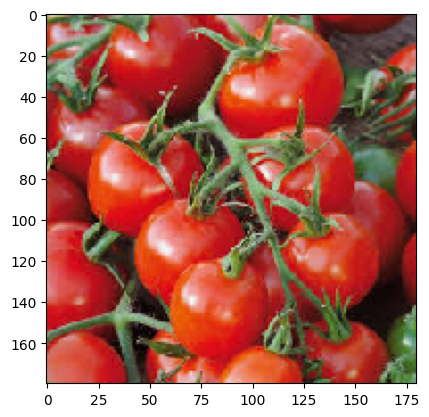

In [129]:
image_size = (180, 180)
image = tf.keras.preprocessing.image.load_img( "/content/drive/MyDrive/test/tomatoes/img_p1_24.jpeg", target_size=image_size)
plt.imshow(image)

input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.

input_arr = input_arr.astype('float32') / 255.  # This is VERY important

predictions = model_2.predict(input_arr)
score = tf.nn.softmax(predictions[0])
print(score)
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))

#3 Завдання

In [130]:
df = pd.read_csv("tripadvisor_hotel_reviews.csv")
df.columns

Index(['Review', 'Rating'], dtype='object')

In [131]:
from collections import Counter
Counter(df['Rating'])

Counter({4: 6039, 2: 1793, 3: 2184, 5: 9054, 1: 1421})

In [132]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [133]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
for i in range (len(df)):
  text = df.at[i,'Review']
  text = text.lower()
  text = re.sub("@\S+", " ", text)
  text = re.sub("https*\S+", " ", text)
  text = re.sub("#\S+", " ", text)
  text = re.sub("\d", " ", text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\n', ' ', text)
  text = re.sub(' \w ', ' ', text)
  text = re.sub(' \w{2} ', ' ', text)
  text = re.sub('\s{2,}',' ', text)
  text = ' '.join([word for word in text.split(' ') if word not in stop_words])
  df.at[i,'Review'] = text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [134]:
df = df.loc[(df['Rating'] == 1)|(df['Rating'] == 5)]

In [135]:
print(df)

                                                  Review  Rating
3      unique great stay wonderful time hotel monaco ...       5
4      great stay great stay went seahawk game awesom...       5
5      love monaco staff husband stayed hotel crazy w...       5
6      cozy stay rainy city husband spent nights mona...       5
8      hotel stayed hotel monaco cruise rooms generou...       5
...                                                  ...     ...
20476  night trust disappointed stay hotel say best w...       5
20480  great play stay stay loyal inn package deal ha...       5
20482  great choice wife chose best western quite bit...       5
20486  best kept secret time staying charm star beat ...       5
20489  hotel theft ruined vacation hotel opened sept ...       1

[10475 rows x 2 columns]


In [136]:
x_train, x_test, y_train, y_test = train_test_split(df['Review'], df['Rating'], test_size=0.20)

In [137]:
from keras.preprocessing.text import Tokenizer
vocab_size = 10000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(x_train)

In [138]:
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

In [139]:
max_length = 100
padding_type = "post"
trunction_type="post"
x_train_padded = keras.utils.pad_sequences(x_train_sequences,maxlen=max_length, padding=padding_type, truncating=trunction_type)
x_test_padded = keras.utils.pad_sequences(x_test_sequences,maxlen=max_length, padding=padding_type, truncating=trunction_type)

In [140]:
!wget --no-check-certificate \
http://nlp.stanford.edu/data/glove.6B.zip \
-O /tmp/glove.6B.zip

--2023-11-18 20:53:42--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-18 20:53:43--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-18 20:53:43--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’


In [141]:
import os
import zipfile
with zipfile.ZipFile('/tmp/glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/glove')

In [142]:
import numpy as np
embeddings_index = {}
f = open('/tmp/glove/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [143]:
word_index = tokenizer.word_index

In [144]:
embedding_matrix = np.zeros((len(word_index) + 1, max_length))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [145]:
model_3 = keras.Sequential([
    keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=max_length,  weights=[embedding_matrix], input_length=max_length, trainable=False),
    keras.layers.LSTM(64),
    keras.layers.Dense(1, activation='sigmoid')
])

In [146]:
model_3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0000001), loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [147]:
model_3.fit(x_train_padded, y_train, epochs=20, validation_data=(x_test_padded, y_test), batch_size=128)

Epoch 1/20
66/66 [==============================] - 17s 193ms/step - loss: 0.5449 - accuracy: 0.1116 - val_loss: 0.5646 - val_accuracy: 0.1198
Epoch 2/20
66/66 [==============================] - 14s 207ms/step - loss: 0.5428 - accuracy: 0.1131 - val_loss: 0.5627 - val_accuracy: 0.1217
Epoch 3/20
66/66 [==============================] - 15s 228ms/step - loss: 0.5407 - accuracy: 0.1140 - val_loss: 0.5607 - val_accuracy: 0.1217
Epoch 4/20
66/66 [==============================] - 15s 227ms/step - loss: 0.5386 - accuracy: 0.1144 - val_loss: 0.5588 - val_accuracy: 0.1222
Epoch 5/20
66/66 [==============================] - 15s 223ms/step - loss: 0.5364 - accuracy: 0.1148 - val_loss: 0.5568 - val_accuracy: 0.1236
Epoch 6/20
66/66 [==============================] - 12s 188ms/step - loss: 0.5343 - accuracy: 0.1152 - val_loss: 0.5548 - val_accuracy: 0.1246
Epoch 7/20
66/66 [==============================] - 13s 196ms/step - loss: 0.5322 - accuracy: 0.1158 - val_loss: 0.5528 - val_accuracy: 0.1251

In [148]:
loss, accuracy = model_3.evaluate(x_test_padded, y_test)
print('Test accuracy :', accuracy)

66/66 [==============================] - 1s 20ms/step - loss: 0.5273 - accuracy: 0.1270
Test accuracy : 0.12696897983551025
